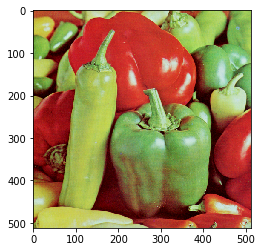

(512, 512, 3)
[[[101   0   0]
  [140   0 142]
  [151   0 146]
  ...
  [192   0 158]
  [205   0 177]
  [120   0 181]]

 [[123   0   0]
  [191  96  46]
  [190  87  51]
  ...
  [154 202  85]
  [136 188  86]
  [115 192  85]]

 [[126   0   0]
  [185 102  50]
  [185  93  48]
  ...
  [144 200  91]
  [148 200  77]
  [113 195  87]]

 ...

 [[ 92   0   0]
  [127 137  47]
  [136 145  54]
  ...
  [181 213 174]
  [177 210 170]
  [189 197 129]]

 [[ 92   0   0]
  [142 124  52]
  [126 115  48]
  ...
  [175 211 163]
  [176 206 170]
  [196 165 117]]

 [[ 93   0   0]
  [119  79  36]
  [139 135  58]
  ...
  [166 199 150]
  [171 205 181]
  [198 200 171]]]
(512, 512, 3)
[[[101   0   0]
  [140   0 142]
  [151   0 146]
  ...
  [192   0 158]
  [205   0 177]
  [120   0 181]]

 [[123   0   0]
  [191  96  46]
  [190  87  51]
  ...
  [154 202  85]
  [136 188  86]
  [115 192  85]]

 [[126   0   0]
  [185 102  50]
  [185  93  48]
  ...
  [144 200  91]
  [148 200  77]
  [113 195  87]]

 ...

 [[ 92   0   0]
  [127 1

In [6]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

img = Image.open('./Image/pepper.bmp')

img = np.array(img)
img_grey = Image.open('./Image/pepper_grey.bmp')
img_grey = np.array(img_grey)


img_cv2 = cv2.imread('./Image/pepper.bmp')
img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

plt.imshow(img_cv2)
plt.show()

img_cv2 = np.array(img)
print(img.shape)
print(img)


print(img_cv2.shape)
print(img_cv2)

[[101 140 151 ... 192 205 120]
 [123 191 190 ... 154 136 115]
 [126 185 185 ... 144 148 113]
 ...
 [ 92 127 136 ... 181 177 189]
 [ 92 142 126 ... 175 176 196]
 [ 93 119 139 ... 166 171 198]]
[[  0   0   0 ...   0   0   0]
 [  0  96  87 ... 202 188 192]
 [  0 102  93 ... 200 200 195]
 ...
 [  0 137 145 ... 213 210 197]
 [  0 124 115 ... 211 206 165]
 [  0  79 135 ... 199 205 200]]
[[  0 142 146 ... 158 177 181]
 [  0  46  51 ...  85  86  85]
 [  0  50  48 ...  91  77  87]
 ...
 [  0  47  54 ... 174 170 129]
 [  0  52  48 ... 163 170 117]
 [  0  36  58 ... 150 181 171]]


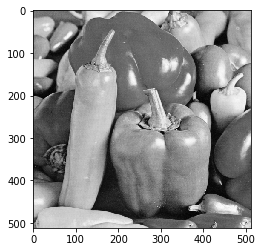

In [12]:
def FL11(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    print(r)
    print(g)
    print(b)
    Y = 0.3*r + 0.5*g + 0.2*b
    
    return Y

change = FL11(img)

plt.imshow(change, cmap='gray')
plt.show()


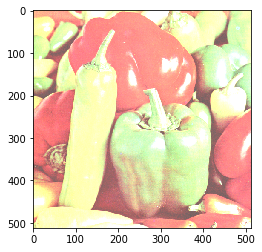

In [15]:
def fl12(image, offset):
    height, width, channel = image.shape
#     output = np.empty(image.shape)
    
    for z in range(channel):
        for y in range(height):
            for x in range(width):
                if offset > 0:
                    image[y, x, z] = min(image[y, x, z] + offset, 255)
                elif offset < 0:
                    image[y, x, z] = max(image[y, x, z] + offset, 0)
               
    return image
asd = fl12(img_cv2,100)
plt.imshow(asd)


In [17]:
def FL13(rgb):
    for i in range(0,512-128,1):   #right
        crop_img = rgb[0:128, 0+i:128+i]
        cv2.imwrite('./video/test{}.bmp'.format(i), crop_img)
    for i in range(0,512-128,1):  #down
        crop_img = rgb[0+i:128+i, 512-128:512]
        cv2.imwrite('./video/test{}.bmp'.format(i+384), crop_img)
    for i in range(0,512-128,1):  #left
        crop_img = rgb[512-128:512, 512-128-i:512-i]
        cv2.imwrite('./video/test{}.bmp'.format(i+768), crop_img)
    for i in range(0,512-256,1):  #up
        crop_img = rgb[512-128-i:512-i, 0:128]
        cv2.imwrite('./video/test{}.bmp'.format(i+1152), crop_img)   

    for i in range(0,512-256,1):  #right
        crop_img = rgb[128:256, 0+i:128+i]
        cv2.imwrite('./video/test{}.bmp'.format(i+1408), crop_img)       
    for i in range(0,512-384,1):    #down
        crop_img = rgb[128+i:256+i, 256:384]
        cv2.imwrite('./video/test{}.bmp'.format(i+1664), crop_img)       
    for i in range(0,512-384,1):    #left
        crop_img = rgb[256:384,256-i:384-i]
        cv2.imwrite('./video/test{}.bmp'.format(i+1792), crop_img)       
  
    frame_array = []
    for filename in glob.glob('./video/*.bmp'):
        img_v = cv2.imread(filename)
        img_v = cv2.cvtColor(img_v, cv2.COLOR_BGR2RGB)
        height, width, layers = img_v.shape
        size = (width,height)
        frame_array.append(img_v)

    out = cv2.VideoWriter('FL13.avi', cv2.VideoWriter_fourcc(*'DIVX'), 100 ,size)
  
    for i in range(len(frame_array)):
        out.write(frame_array[i])
    out.release()
            

    return

change = FL13(img_cv2)


256


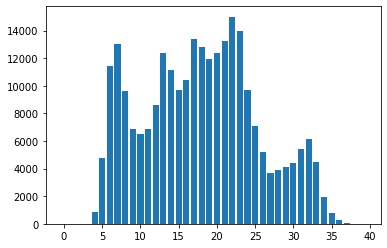

In [5]:
def FL14(rgb, N):
    a = np.zeros(256)
    b = np.zeros(N)
    for i in range(0, rgb.shape[0], 1):
        for j in range(0, rgb.shape[1], 1):
            for k in range(0,256, 1):
                if rgb[i][j] == k:
                    a[k] += 1
                    break
    print(a.size)
    
    for i in range(N):
        for j in range(i* (256//N), (i+1)* (256//N) ,1):
            b[i] += a[j]


    x = np.arange(N)
    plt.bar(x,b)
    plt.show()
    return

FL14(img_grey, 40)


26.0
9.918212890625e-05
Threshold : 102
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 1 1 ... 1 1 1]
 [0 1 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]]


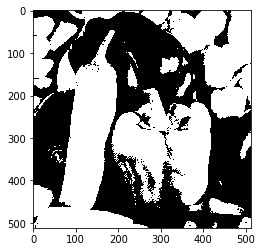

In [7]:
def FL15(rgb):
    a = np.zeros(256)
    w_0 = np.zeros(256)
    mean_0 = np.zeros(256)
    mean_1 = np.zeros(256)
    v_bet = np.zeros(256)
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            for k in range(256):
                if rgb[i][j] == k:
                    a[k] += 1
                    break
    
    w_0[0] = a[0]/(512*512)
    print(a[0])
    print(w_0[0])
    mean_0[0] = 0
    sum = 0
    v_bet_max = 0
    T = 0

    for i in range (256):
        sum += (i*a[i]/(512*512))

    mean = sum



    for t in range(1, 256):
        w_0[t] = w_0[t-1] + a[t]/(512*512)
        mean_0[t] = (w_0[t-1] * mean_0[t-1] + t * a[t]/(512*512))/(w_0[t]+0.00001)
        mean_1[t] = (mean - w_0[t]* mean_0[t]) / (1- w_0[t]+0.00001)

        v_bet[t] = w_0[t]* (1-w_0[t]) * pow(mean_0[t] - mean_1[t],2)
        if v_bet_max < v_bet[t]:
            v_bet_max = v_bet[t]
            T = t

    print('Threshold : {}'.format(T))
    for i in range(0, rgb.shape[0],1):
        for j in range(0,rgb.shape[1],1):
                if (rgb[i][j] < T):
                    rgb[i][j] = 0
                else:
                    rgb[i][j] = 1

    print(rgb)
    plt.imshow(rgb,cmap='gray')
    plt.show()
    return

FL15(img_grey)